In [21]:
#https://thisdata.com/blog/unsupervised-machine-learning-with-one-class-support-vector-machines/
#sys.path

import sys
sys.path.insert(0, r'/home/fabris/Documents/Trabajo/Doctorado/pycharm_DynCode/')

import DataAnalysis
from DataAnalysis import TimeSerieDC
from DataAnalysis import statistics
import numpy as np


from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics  

In [22]:
data= pd.read_pickle("/home/fabris/Documents/Trabajo/Doctorado/Dyncode/low_res_datasets/2018_E1_28/Data_Analysis/Quantifiers/data.pkl")
n_data = data.dropna(inplace=False)

print(data.shape,data.dropna().shape,n_data.shape)

(29373, 34) (26676, 34) (26676, 34)


In [23]:
mask = data.label == "an_0ng";
label = pd.DataFrame(np.ones(n_data[mask].shape[0]));

X_train =   n_data[mask].drop(['label'],axis = 1); y_train=label;

/home/fabris/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/fabris/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [24]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train = pd.DataFrame(min_max_scaler.fit_transform(X_train)) 

In [25]:
gamma = 'auto'
nu = 0.1
kernel="rbf" #poly

clf = svm.OneClassSVM(kernel=kernel,nu=nu,gamma=gamma)
clf.fit(X_train)


OneClassSVM(gamma='auto', nu=0.1)

In [31]:
#print("accuracy: ", metrics.accuracy_score(y_train, y_pred_train))  
#print("precision: ", metrics.precision_score(y_train, y_pred_train))  
#print("recall: ", metrics.recall_score(y_train, y_pred_train))  
#print("f1: ", metrics.f1_score(y_train, y_pred_train))  
#print("area under curve (auc): ", metrics.roc_auc_score(y_train, y_pred_train))  

In [26]:
y_pred_train = clf.predict(X_train)
prediction = pd.DataFrame(y_pred_train,index=X_train.index)

In [27]:
len(prediction)-len(data[mask].MEAN_INTENSITY_BP)#prediction

-1305

In [9]:
prueba = pd.concat([data[mask].MEAN_INTENSITY_BP, prediction], axis=1, sort=False)
prueba.columns = ['MEAN_INTENSITY_BP','pred']
#prueba.set_index(pd.read_pickle("./an_0ng_data.pkl").index,inplace=True)
#prueba.sort_index(inplace=True)

NotImplementedError: Can only union MultiIndex with MultiIndex or Index of tuples, try mi.to_flat_index().union(other) instead.

In [13]:
plt.rcdefaults()
df = prueba
cells = df.index.get_level_values(0).unique()
cols = 2
Tot = np.sum(len(cells));Cols = cols;Rows = Tot // Cols;
if Tot % Cols != 0:Rows = Rows + 1
fig, axs = plt.subplots(Rows, Cols, sharex=True, sharey=True, figsize=(8.27, 11.69))
axs = axs.ravel()


for z,cell in enumerate(cells):
    ax = axs[z];
    ax.grid(False);

    if cells[-1] >= cell:
        ax.plot(df.loc[cells[cell]]['MEAN_INTENSITY_BP'], linewidth=0.5)
        ax.fill_between(df.loc[cells[cell]].index, 5000,-5000, where=df.loc[cells[cell]]['pred']==-1, facecolor='yellow', alpha=0.5)
        ax.text(0.9, 0.1, 'Cell ' + str(cell), ha='center', va='center', transform=ax.transAxes, fontsize=5)

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, wspace=0.07, hspace=0.07)
plt.show()


NameError: name 'prueba' is not defined

In [88]:
data_WT=pd.read_pickle("./data_WT.pkl")

sc_data_WT = pd.DataFrame(min_max_scaler.transform(data_WT))

print(sc_data_WT.shape)
print(sc_data_WT.dropna().shape)
sc_data_WT.dropna(inplace=True)
print(sc_data_WT.shape)

print(X_train.max(),sc_data_WT.max())

(16595, 12)
(15203, 12)
(15203, 12)
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
dtype: float64 0     1.081298
1     2.411336
2     0.944453
3     1.139969
4     1.778698
5     0.583960
6     0.469017
7     0.788689
8     2.390490
9     5.227029
10    1.048776
11    0.969845
dtype: float64


In [89]:
prediction = pd.DataFrame(clf.predict(sc_data_WT),index=sc_data_WT.index)
prueba = pd.concat([data_WT.MEAN_INTENSITY_BP, prediction], axis=1, sort=False)
prueba.columns =  ['DT_MEAN_INTENSITY','pred']
prueba.set_index(pd.read_pickle("./an_WT_ESL_data.pkl").index,inplace=True)
prueba.sort_index(inplace=True)

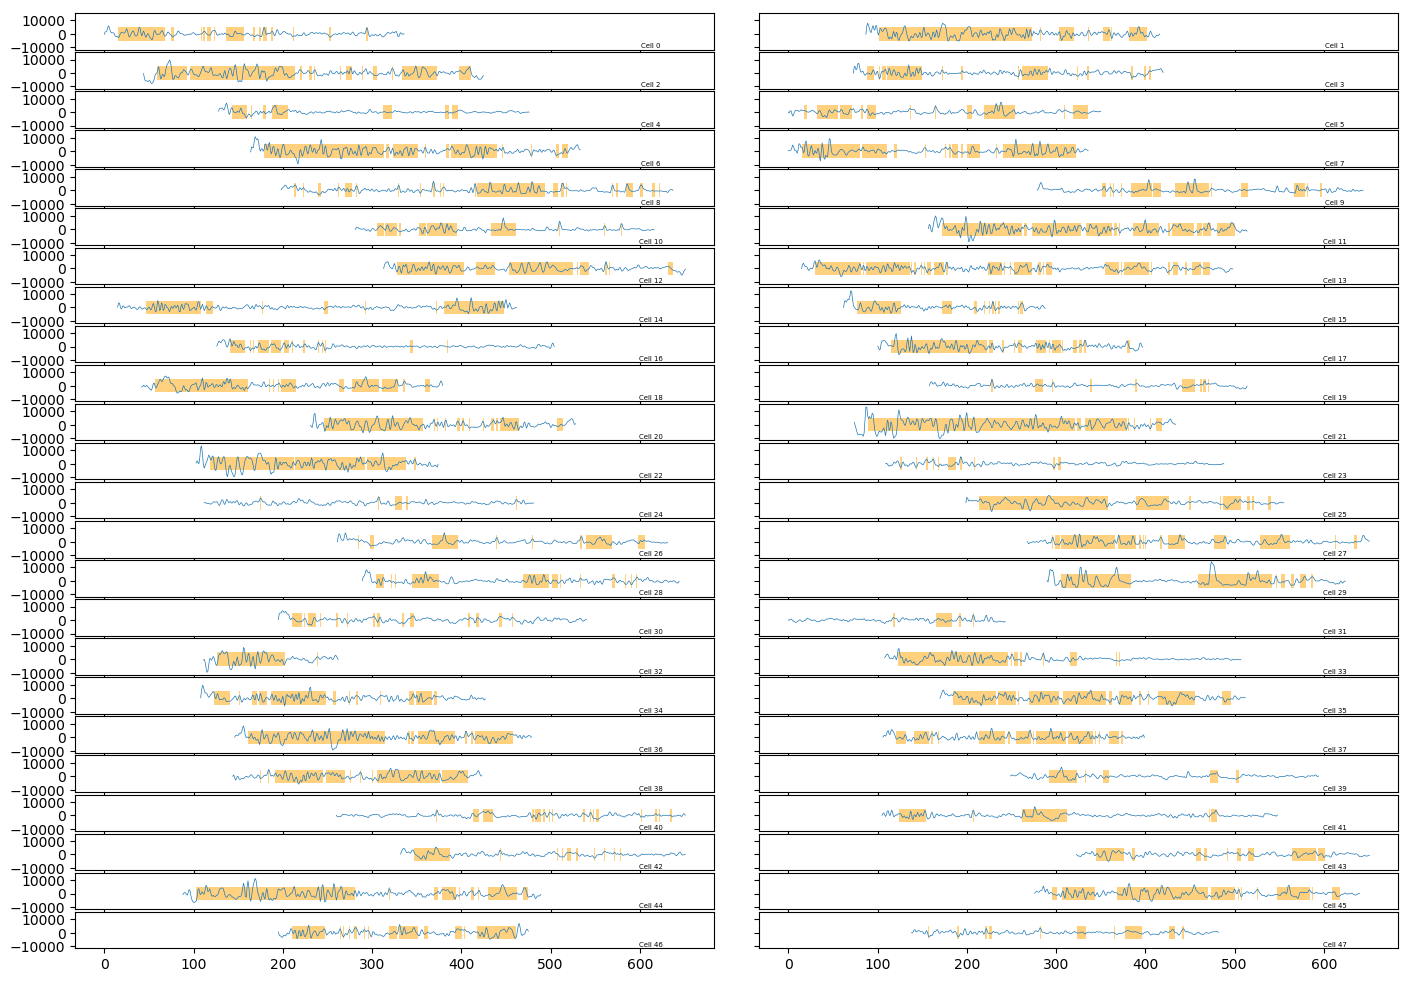

In [90]:
plt.rcdefaults()
df = prueba
cells = df.index.get_level_values(0).unique()
cols = 2
Tot = np.sum(len(cells));Cols = cols;Rows = Tot // Cols;
if Tot % Cols != 0:Rows = Rows + 1
fig, axs = plt.subplots(Rows, Cols, sharex=True, sharey=True, figsize=(8.27*2, 11.69))
axs = axs.ravel()


for z,cell in enumerate(cells):
    ax = axs[z];
    ax.grid(False);

    if cells[-1] >= cell:
        ax.plot(df.loc[cells[cell]]['DT_MEAN_INTENSITY'], linewidth=0.5)
        ax.fill_between(df.loc[cells[cell]].index, 5000,-5000, where=df.loc[cells[cell]]['pred']==-1, facecolor='orange', alpha=0.5)
        ax.text(0.9, 0.1, 'Cell ' + str(cell), ha='center', va='center', transform=ax.transAxes, fontsize=5)

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, wspace=0.07, hspace=0.07)
plt.show()

### PCA

In [93]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
D=pca.explained_variance_ratio_

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

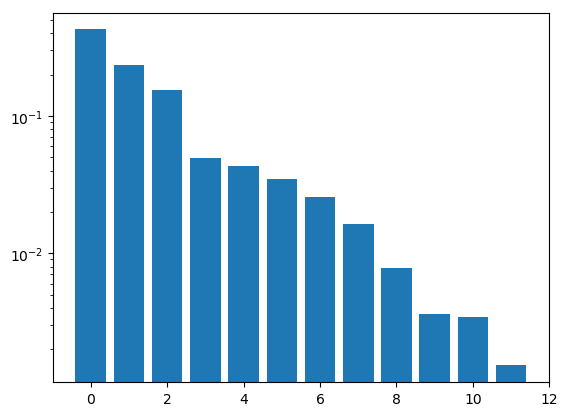

<BarContainer object of 12 artists>

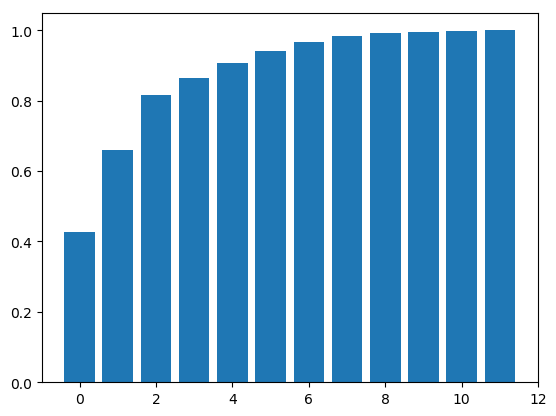

In [120]:
plt.bar(range(len(D)),D)
#plt.ylim([0,0.5])
plt.yscale('log')
plt.show()
plt.clf()
plt.bar(range(len(D)),np.cumsum(D))


In [117]:
pca.components_[0:3]

array([[-0.17940083,  0.05876678,  0.09329524,  0.04741307,  0.01197847,
         0.01600713,  0.03726535,  0.02882463, -0.01605337,  0.06624987,
         0.75257618,  0.61625714],
       [-0.43862888,  0.1288199 ,  0.63892612,  0.480168  , -0.00763635,
         0.05203649,  0.21254964,  0.23660644, -0.001379  ,  0.09381312,
        -0.12950395, -0.15073853],
       [-0.84557379,  0.10213961, -0.32553225, -0.31144174,  0.00195743,
         0.00460574, -0.12348733, -0.14796567, -0.08439133,  0.11408502,
        -0.07091238, -0.09628817]])

In [134]:
for i in np.abs(pca.components_[0]).argsort()[::-1]:
    print(data.columns[i],np.abs(pca.components_[0])[i])

MEAN_INTENSITY_BP_PE 0.7525761775687024
MEAN_INTENSITY_BP_F 0.6162571446638823
MEAN_INTENSITY 0.17940083437566126
MEAN_INTENSITY_PE 0.09329523588749988
MEAN_INTENSITY_BP_LOCAL_VAR 0.06624987144713515
MEAN_INTENSITY_LOCAL_VAR 0.058766784628318615
MEAN_INTENSITY_F 0.04741307340880515
DT_MEAN_INTENSITY_PE 0.037265352100133195
DT_MEAN_INTENSITY_F 0.028824629108567576
MEAN_INTENSITY_BP 0.016053366855246377
DT_MEAN_INTENSITY_LOCAL_VAR 0.016007132582784876
DT_MEAN_INTENSITY 0.011978465224110146


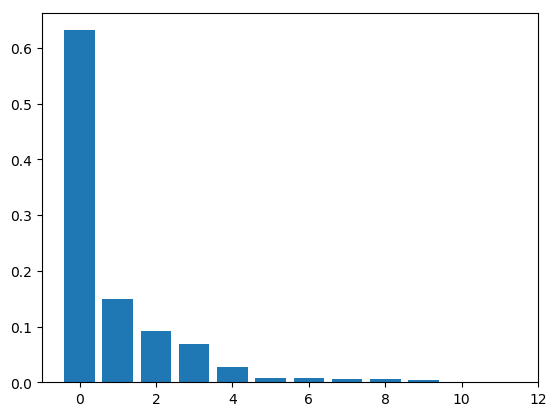

<BarContainer object of 12 artists>

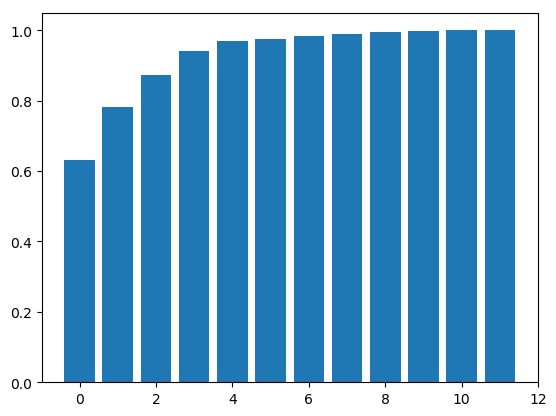

In [123]:
pca_WT = PCA()
pca_WT.fit(sc_data_WT)
D=pca_WT.explained_variance_ratio_
plt.bar(range(len(D)),D)
#plt.ylim([0,0.5])
#plt.yscale('log')
plt.show()
plt.clf()
plt.bar(range(len(D)),np.cumsum(D))

In [124]:
prueba = pca_WT.components_[0:3]

array([[-0.03027944,  0.40461036,  0.08517425,  0.05375615,  0.08294246,
         0.12223947,  0.04802884,  0.03836295,  0.00543406,  0.89252484,
         0.04538634,  0.03063934],
       [ 0.26129843, -0.01595035,  0.04109097,  0.02700299,  0.39391749,
        -0.00406979,  0.01846223,  0.01669561,  0.87787919, -0.0348151 ,
         0.02910797,  0.02264273],
       [ 0.04449772, -0.06061712,  0.47381102,  0.36629382, -0.03534534,
        -0.01540539,  0.21917327,  0.24020651, -0.07517124, -0.0984451 ,
         0.57209195,  0.43107239]])

In [129]:
np.abs(pca.components_[0]).argsort()[::-1]#[:3]

array([10, 11,  0,  2,  9,  1,  3,  6,  7,  8,  5,  4])

In [133]:
for i in np.abs(pca.components_[0]).argsort()[::-1]:
    print(data.columns[i],np.abs(pca.components_[0])[i])

MEAN_INTENSITY_BP_PE 0.7525761775687024
MEAN_INTENSITY_BP_F 0.6162571446638823
MEAN_INTENSITY 0.17940083437566126
MEAN_INTENSITY_PE 0.09329523588749988
MEAN_INTENSITY_BP_LOCAL_VAR 0.06624987144713515
MEAN_INTENSITY_LOCAL_VAR 0.058766784628318615
MEAN_INTENSITY_F 0.04741307340880515
DT_MEAN_INTENSITY_PE 0.037265352100133195
DT_MEAN_INTENSITY_F 0.028824629108567576
MEAN_INTENSITY_BP 0.016053366855246377
DT_MEAN_INTENSITY_LOCAL_VAR 0.016007132582784876
DT_MEAN_INTENSITY 0.011978465224110146


In [135]:
for i in np.abs(pca_WT.components_[0]).argsort()[::-1]:
    print(data.columns[i],np.abs(pca_WT.components_[0])[i])

MEAN_INTENSITY_BP_LOCAL_VAR 0.8925248407545442
MEAN_INTENSITY_LOCAL_VAR 0.4046103626569673
DT_MEAN_INTENSITY_LOCAL_VAR 0.12223946880628268
MEAN_INTENSITY_PE 0.08517424505997974
DT_MEAN_INTENSITY 0.08294245940932621
MEAN_INTENSITY_F 0.053756148054267115
DT_MEAN_INTENSITY_PE 0.048028843290851865
MEAN_INTENSITY_BP_PE 0.045386336897801
DT_MEAN_INTENSITY_F 0.03836295332267348
MEAN_INTENSITY_BP_F 0.03063934419004923
MEAN_INTENSITY 0.030279436654727473
MEAN_INTENSITY_BP 0.005434062529428806
